In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

import sys
import os
import pickle
import torch
from IPython.display import HTML




# Allow imports from the parent directory
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from main import tools

In [22]:

# File paths for preprocessed data and fitted data
pre_file_path = 'datas/datas_pre.pkl'

with open(pre_file_path, 'rb') as f:
    datas_pre = pickle.load(f)


In [23]:
data = datas_pre[2]

In [24]:
len(datas_pre), data.m, data.date, data.XY_full.shape

(10, 11368, '2024-09-18', torch.Size([45045, 2]))

In [25]:
f = data.plot_observations(frame=3, gif = True, full = True)
HTML(f.to_html5_video())


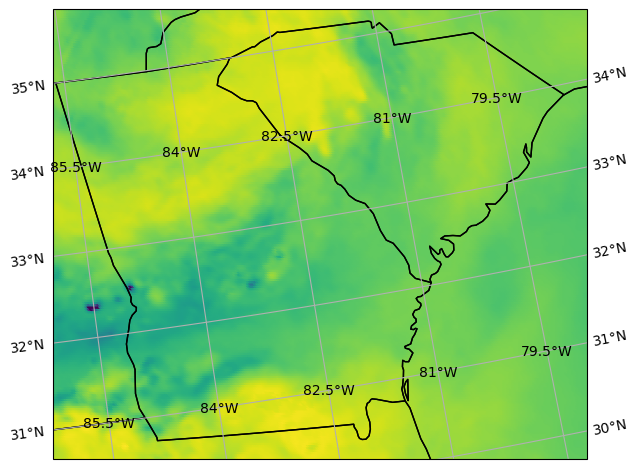

In [26]:
f = data.plot_observations(frame=0, gif = False, full = True)


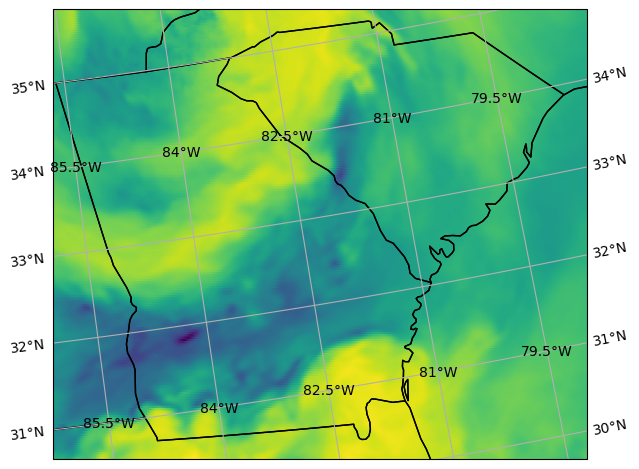

In [27]:
f = data.plot_observations(frame=3, gif = False, full = True)
#HTML(f.to_html5_video())


In [19]:
indices = torch.randperm(data.m)[:500]
f = data.plot_vel_data(indices = indices, frame = 1, gif = True)
HTML(f.to_html5_video())


In [3]:
fit_file_path = 'datas/datas_fit.pkl'

with open(fit_file_path, 'rb') as f:

    datas_fit = pickle.load(f)

In [4]:
len(datas_fit)

2

In [5]:
data = datas_fit[0]

In [6]:
data.XY.shape

torch.Size([5005, 2])

In [7]:
indices = torch.randperm(data.m)[:500]
f = data.plot_vel(indices, frame=0, color="blue", gif = True)
HTML(f.to_html5_video())


In [17]:
from main import ode

In [18]:
data.time/60

1.25851891040802

In [13]:
from main import ode

In [14]:
vel = ode.Vel_hat(data)

In [16]:
dt_vel_pen, dx_vel_pen  = ode.pen_D_vel_mean(data.T, data.XY, vel)

In [18]:
dx_vel_pen

tensor(6.5462, grad_fn=<MeanBackward0>)

In [9]:
torch.cuda.empty_cache()